In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator as Calculator




In [18]:
#Data Cleaning
data = pd.read_excel("inputdata.xlsx")
data['EC_value'], data['EC_error'] = zip(*data['ELE_COD'].map(lambda x: x.split('±')))
data.head()

,NUM,A,B,MOLFRC_A,T,P,ELE_COD,EC_value,EC_error
0,1,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,298.15,101,1.166 ± 0.058,1.166,0.058
1,2,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,299.15,101,1.203 ± 0.06,1.203,0.06
2,3,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,300.15,101,1.242 ± 0.062,1.242,0.062
3,4,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,301.15,101,1.271 ± 0.064,1.271,0.064
4,5,[O-]S(=O)(=O)C.c1c[n+](cn1CCCC)C,O,0.004,302.15,101,1.289 ± 0.064,1.289,0.064


In [19]:
#Setting up for molecular descriptors
n = data.shape[0]
list_of_descriptors = ['NumHeteroatoms','MolWt','NOCount','NumHDonors','RingCount','NumAromaticRings','NumSaturatedRings','NumAliphaticRings']
calc = Calculator(list_of_descriptors)
D = len(list_of_descriptors)
d = len(list_of_descriptors)*2 + 3
print(n,d)

2523 19


In [20]:
#setting up the x and y matrices
X = []
X = np.zeros((n,d))
X[:,-3] = data['T']
X[:,-2] = data['P']
X[:,-1] = data['MOLFRC_A']
for i in range(n):
    A = Chem.MolFromSmiles(data['A'][i])
    B = Chem.MolFromSmiles(data['B'][i])
    X[i][:D]    = calc.CalcDescriptors(A)
    X[i][D:2*D] = calc.CalcDescriptors(B)


(2523, 19)


In [21]:
new_data = pd.DataFrame(X,columns=['NumHeteroatoms_A','MolWt_A','NOCount_A','NumHDonors_A','RingCount_A','NumAromaticRings_A','NumSaturatedRings_A','NumAliphaticRings_A','NumHeteroatoms_B','MolWt_B','NOCount_B','NumHDonors_B','RingCount_B','NumAromaticRings_B','NumSaturatedRings_B','NumAliphaticRings_B','T','P','MOLFRC_A'])
y = data['EC_value']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

/Users/SarahsAdventure/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


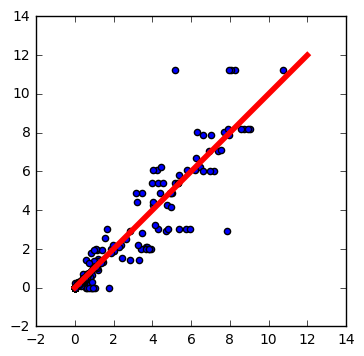

In [98]:
#MLPClassifier
alphas = np.array([0.1,0.01,0.001,0.0001])
mlp_class = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=5000, random_state=None,learning_rate_init=0.01)
gs = GridSearchCV(mlp_class, param_grid=dict(alpha=alphas))

gs.fit(X_train,y_train)

plt.figure(figsize=(4,4))
plt.scatter(y_test.values.astype(np.float), gs.predict(X_test))
plt.plot([0,12],[0,12],lw=4,c = 'r')
plt.show()

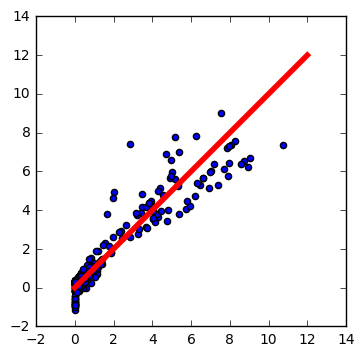

In [90]:
#MLPRegressor
alphas = np.array([5,2,5,1.5,1,0.1,0.01,0.001,0.0001,0])
mlp_regr = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=5000, random_state=None,learning_rate_init=0.01)
gs = GridSearchCV(mlp_regr, param_grid=dict(alpha=alphas))
gs.fit(X_train,y_train)

plt.figure(figsize=(4,4))
plt.scatter(y_test.values.astype(np.float), gs.predict(X_test))
plt.plot([0,12],[0,12],lw=4,c = 'r')
plt.show()


/Users/SarahsAdventure/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SarahsAdventure/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SarahsAdventure/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/SarahsAdventure/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:4

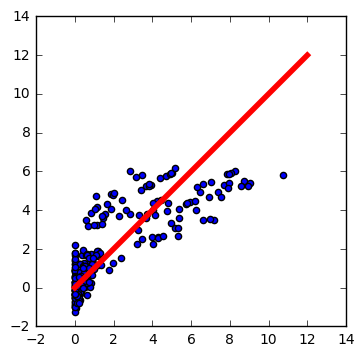

In [99]:
#Lasso
alphas = np.array([0.1,0.01,0.001,0.0001])
lasso = Lasso(alpha=0.001, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=10000, tol=0.001, positive=False, random_state=None, selection='cyclic')
gs = GridSearchCV(lasso, param_grid=dict(alpha=alphas))
gs.fit(X_train,y_train)
plt.figure(figsize=(4,4))
plt.scatter(y_test.values.astype(np.float),gs.predict(X_test))
plt.plot([0,12],[0,12],lw=4,c = 'r')
plt.show()

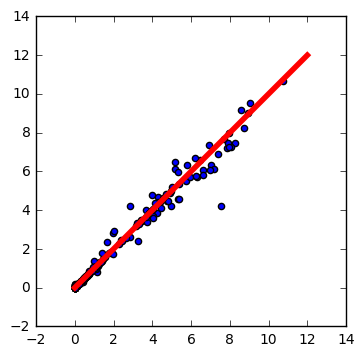

In [97]:
#SVR
svr = SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=1.0, epsilon=0.01, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
svr = GridSearchCV(svr, cv=5, param_grid={"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)})
svr.fit(X_train,y_train)

plt.figure(figsize=(4,4))
plt.scatter(y_test.values.astype(np.float), svr.predict(X_test))
plt.plot([0,12],[0,12],lw=4,c = 'r')
plt.show()
